In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from six.moves import cPickle 
import tensorflow as tf
from keras.datasets import cifar10
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize

Using TensorFlow backend.


In [0]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
(X_train, y_train), (X_test, y_test)= cifar10.load_data()

In [0]:
print(X_train.shape)
print(y_train.shape)

y_train = label_binarize(y_train, classes=[0,1,2,3,4,5,6,7,8,9])
y_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_train, y_train, test_size=0.75, random_state=42)

print(X_train_sm.shape)
print(y_train_sm.shape)

(50000, 32, 32, 3)
(50000, 1)
(12500, 32, 32, 3)
(12500, 10)


In [0]:
#X_train_print = X_train
#y_train_print = y_train
#X_train = X_train.reshape(50000, 3*32*32)
#X_test = X_test.reshape(10000, 3*32*32)
#y_train = y_train.flatten()
#y_test = y_test.flatten()

X_train = X_train_sm.reshape(12500, 3*32*32)
X_test = X_test.reshape(10000, 3*32*32)
#y_train = y_train_sm.flatten()
#y_test = y_test.flatten()
y_train = y_train_sm
y_test = y_test

"""
airplane_index = (y_train == 0)
automobile_index = (y_train == 1)
bird_index = (y_train == 2)
cat_index = (y_train == 3)
deer_index = (y_train == 4)
dog_index = (y_train == 5)
frog_index = (y_train == 6)
horse_index = (y_train == 7)
ship_index = (y_train == 8)
truck_index = (y_train == 9)

airplane_index = (y_test == 0)
automobile_index = (y_test == 1)
bird_index = (y_test == 2)
cat_index = (y_test == 3)
deer_index = (y_test == 4)
dog_index = (y_test == 5)
frog_index = (y_test == 6)
horse_index = (y_test == 7)
ship_index = (y_test == 8)
truck_index = (y_test == 9)
"""

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12500, 3072) (12500, 10)
(10000, 3072) (10000, 10)


In [0]:
# Baseline logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

#lr = LogisticRegression(random_state=42, multi_class='multinomial', solver='sag')
#lr.fit(X_train, y_train)

lr_one_rest = OneVsRestClassifier(LogisticRegression(random_state=42, multi_class='multinomial', solver='sag'))
lr_one_rest.fit(X_train, y_train)
#y_score = clf.fit(X_train, y_train).decision_function(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='sag',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

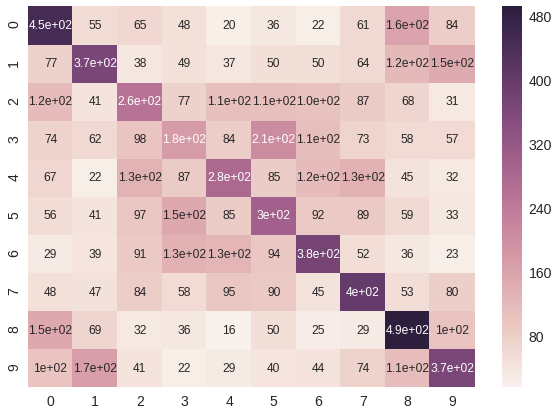

In [0]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

y_pred = lr_one_rest.decision_function(X_test)

y_test_non_category = [ np.argmax(t) for t in y_test ]
y_pred_non_category = [ np.argmax(t) for t in y_pred ]

cnf_matrix = confusion_matrix(y_test_non_category, y_pred_non_category)
df_cnf = pd.DataFrame(cnf_matrix, range(10), range(10))
plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)
sn.heatmap(df_cnf, annot=True, annot_kws={"size": 12})
plt.show()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = lr_one_rest.predict(X_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

TypeError: ignored

In [0]:
 from sklearn.metrics import roc_curve, auc
#y_pred = lr.predict_proba(X_test)
#print(roc_auc_score(y_test, y_pred))
# y_score = lr_one_rest.predict_proba(X_test)
y_score = lr_one_rest.decision_function(X_test)

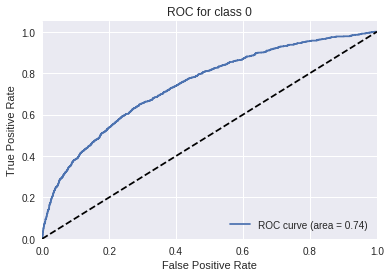

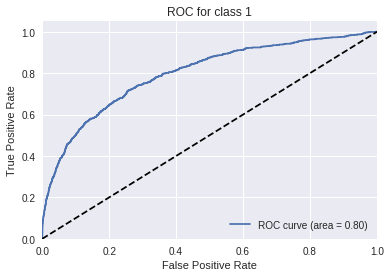

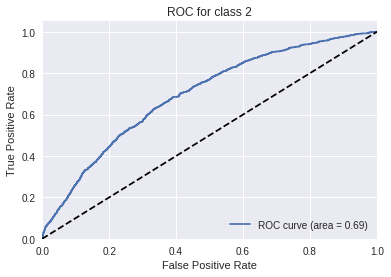

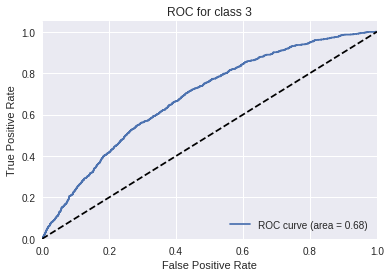

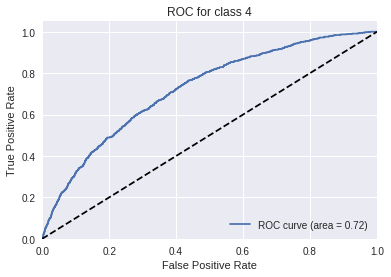

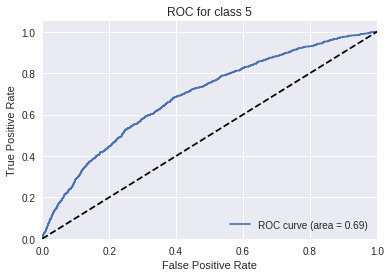

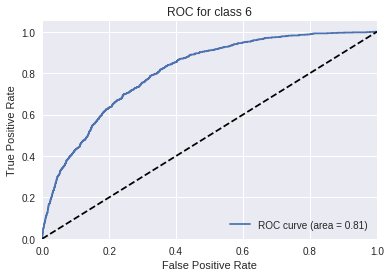

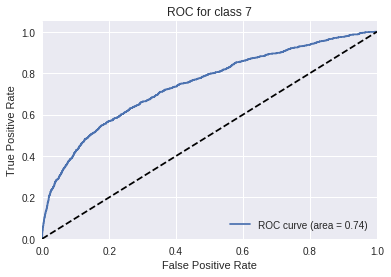

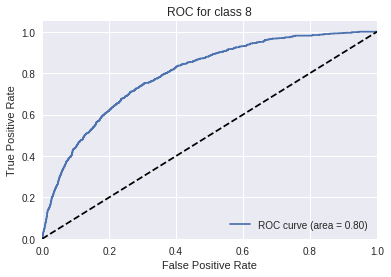

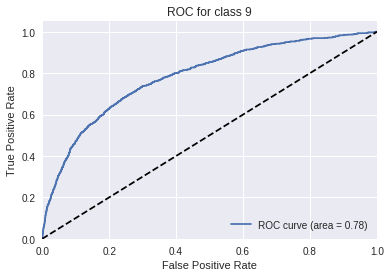

In [0]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(10):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for class {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()

In [0]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

rfc_one_rest = OneVsRestClassifier(RandomForestClassifier(random_state=42, criterion='gini', max_depth=10, min_samples_leaf=10, max_features='auto'))
rfc_one_rest.fit(X_train, y_train)
#y_score = clf.fit(X_train, y_train).decision_function(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=None)

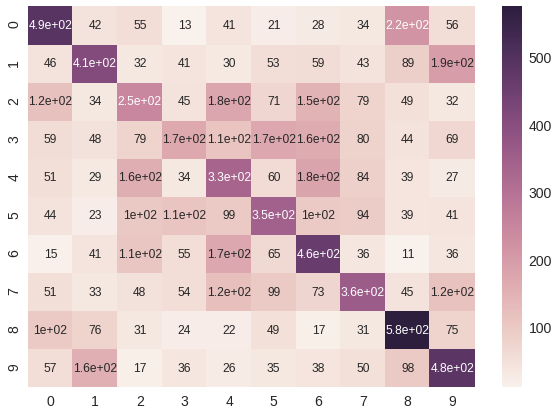

In [0]:
y_pred = rfc_one_rest.predict_proba(X_test)

y_test_non_category = [ np.argmax(t) for t in y_test ]
y_pred_non_category = [ np.argmax(t) for t in y_pred ]

cnf_matrix = confusion_matrix(y_test_non_category, y_pred_non_category)
df_cnf = pd.DataFrame(cnf_matrix, range(10), range(10))
plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)
sn.heatmap(df_cnf, annot=True, annot_kws={"size": 12})
plt.show()

In [0]:
from sklearn.metrics import roc_curve, auc
#y_pred = lr.predict_proba(X_test)
#print(roc_auc_score(y_test, y_pred))
# y_score = lr_one_rest.predict_proba(X_test)
y_score = rfc_one_rest.predict_proba(X_test)

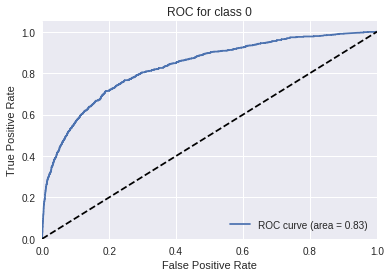

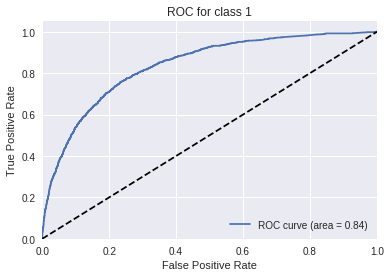

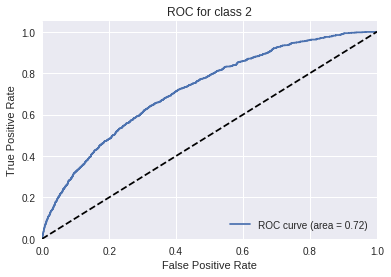

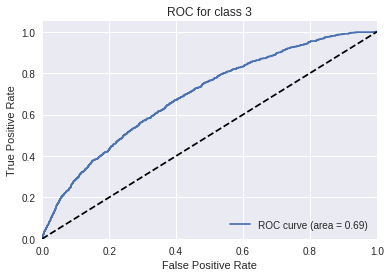

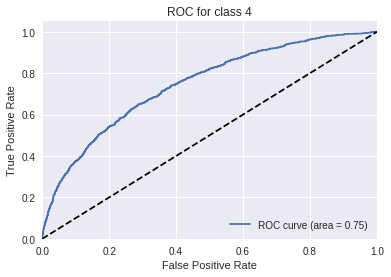

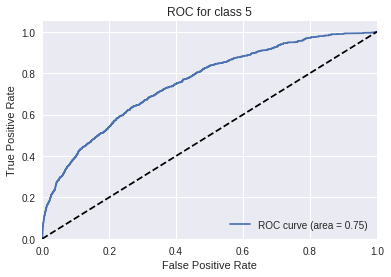

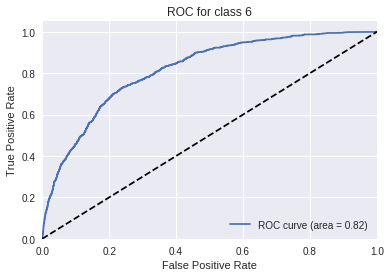

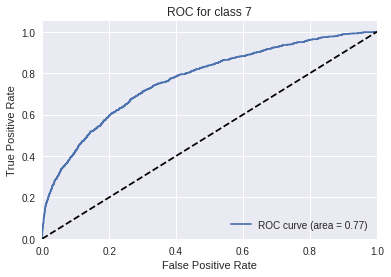

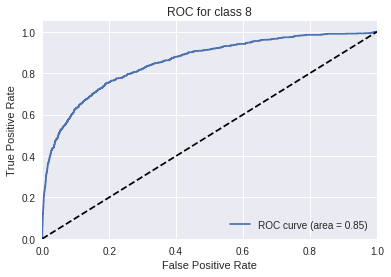

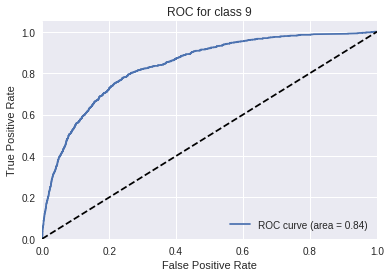

In [0]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(10):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for class {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()